### Assignment 16

Images of size 400x400 are annotated by VIA tool and saved in json file
Used K-means clustering to find out the top 4 anchor boxes



In [5]:
import json
import numpy as np
import sys, os
%matplotlib inline
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/gdrive')
dir = "/content/gdrive/My Drive/Colab Notebooks/EVA/Session16/"

!ls

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive
gdrive	sample_data


#### Reading the Json file having the dimensions of the bounding boxes of the annotated images.

In [7]:
data=[]
with open(dir + "face_annotations_orig.json", "r") as read_file:
    data = json.load(read_file)

<class 'dict'>


#### Extracting bounding box attributes 'width' and 'height'

In [11]:
X = []

imgd = data['_via_img_metadata']

for _, imgval in imgd.items():
    for rgnd in imgval['regions']:
        shape = rgnd['shape_attributes']
        X.append([shape['width'], shape['height']])

print(type(X), X[:2] )
X = np.reshape(X, (-1, 2))
print(type(X), X.shape )

X = X/400
log_X = np.log(X)

<class 'list'> [[76, 150], [42, 125]]
<class 'numpy.ndarray'> (155, 2)


#### Plotting the attributes

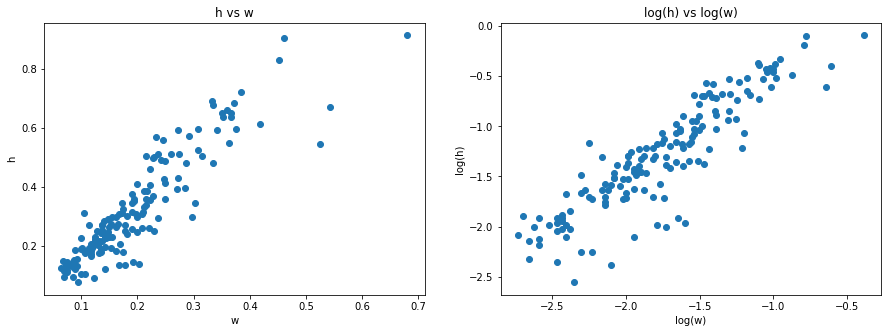

In [12]:
fig, axs = plt.subplots(1,2,figsize=(15,5))

axs[0].plot(X[:, 0], X[:, 1], 'o')
axs[0].set_title('h vs w')
axs[0].set_ylabel('h')
axs[0].set_xlabel('w')

axs[1].plot(log_X[:, 0], log_X[:, 1], 'o')
axs[1].set_title('log(h) vs log(w)')
axs[1].set_ylabel('log(h)')
axs[1].set_xlabel('log(w)')
plt.show()

#### Run K-means cluster on the points with k=4

In [0]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, init="k-means++", n_init=10, max_iter=300, tol=0.0001).fit(X)
lkmeans = KMeans(n_clusters=4, init="k-means++", n_init=10, max_iter=300, tol=0.0001).fit(lX)

y_pred, ly_pred = kmeans.predict(X), lkmeans.predict(log_X)


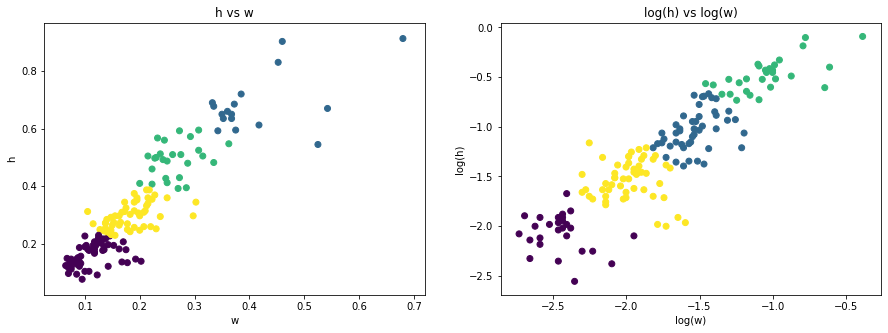

In [14]:
fig, axs = plt.subplots(1,2,figsize=(15,5))

axs[0].scatter(X[:, 0], X[:, 1], c=y_pred)
axs[0].set_title('h vs w')
axs[0].set_ylabel('h')
axs[0].set_xlabel('w')

axs[1].scatter(log_X[:, 0], log_X[:, 1], c=ly_pred)
axs[1].set_title('log(h) vs log(w)')
axs[1].set_ylabel('log(h)')
axs[1].set_xlabel('log(w)')
plt.show()

#### Choosing the Best Boxes
The $log(w)$ vs $log(h)$ association is more equi-spaced and it may be ideal to take up the centroid of the k-means clusters be taken as the final bounding box.

In [0]:
kmeans.cluster_centers_*400

array([[ 47.47272727,  57.11818182],
       [183.88888889, 183.44444444],
       [107.63636364, 192.68181818],
       [ 85.70588235, 116.82352941]])

In [0]:
bb = np.exp(lkmeans.cluster_centers_)*400

## Visualization

Images are selected at random and the image has been superimposed with the computed bounding box. 

In [16]:
import cv2
from os import listdir
from os.path import join
import matplotlib.patches as patches

!unzip -qq "/content/gdrive/My Drive/Colab Notebooks/EVA/Session16/images.zip"
!ls 

gdrive	images	resized  sample_data


In [21]:
!pwd
!ls images

/content
img_001.jpg  img_018.jpg  img_035.jpg  img_052.jpg  img_069.jpg  img_086.jpg
img_002.jpg  img_019.jpg  img_036.jpg  img_053.jpg  img_070.jpg  img_087.jpg
img_003.jpg  img_020.jpg  img_037.jpg  img_054.jpg  img_071.jpg  img_088.jpg
img_004.jpg  img_021.jpg  img_038.jpg  img_055.jpg  img_072.jpg  img_089.jpg
img_005.jpg  img_022.jpg  img_039.jpg  img_056.jpg  img_073.jpg  img_090.jpg
img_006.jpg  img_023.jpg  img_040.jpg  img_057.jpg  img_074.jpg  img_091.jpg
img_007.jpg  img_024.jpg  img_041.jpg  img_058.jpg  img_075.jpg  img_092.jpg
img_008.jpg  img_025.jpg  img_042.jpg  img_059.jpg  img_076.jpg  img_093.jpg
img_009.jpg  img_026.jpg  img_043.jpg  img_060.jpg  img_077.jpg  img_094.jpg
img_010.jpg  img_027.jpg  img_044.jpg  img_061.jpg  img_078.jpg  img_095.jpg
img_011.jpg  img_028.jpg  img_045.jpg  img_062.jpg  img_079.jpg  img_096.jpg
img_012.jpg  img_029.jpg  img_046.jpg  img_063.jpg  img_080.jpg  img_097.jpg
img_013.jpg  img_030.jpg  img_047.jpg  img_064.jpg  img_081.jpg  im

In [0]:
def plot_image(imgd, bb):
    idx = np.random.randint(0, 99)
    key = list(imgd.keys())[idx]
    imgval = imgd[key]
    ps = join("img", imgval["filename"])
    img = cv2.imread(ps)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    fig = plt.gcf()
    fig.set_size_inches(12, 12)
    plt.imshow(img)
    ax = fig.get_axes()[0]
    for rgnd in imgval['regions']:
        shape = rgnd['shape_attributes']
        x, y, w, h = shape['x'], shape['y'], shape['width'], shape['height']
        rect = patches.Rectangle((x, y), w, h, linewidth=2,edgecolor='r',facecolor='none')
        ax.add_patch(rect)
        cx, cy = (x + w/2), (y + h/2)
        nbb = len(bb)
        c = ['g', 'b', 'm', 'c']
        for i in range(nbb):
            w, h = bb[i, 0], bb[i, 1]
            x, y = cx - w/2, cy - h/2
            rect = patches.Rectangle((x, y), w, h, linewidth=2, edgecolor=c[i], facecolor='none')
            ax.add_patch(rect)
    plt.show()

In [0]:
plot_image(imgd, bb)